<a href="https://colab.research.google.com/github/sadikinisaac/irisflower/blob/master/Summary_Stats_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris_Data.csv to Iris_Data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris_Data.csv']))

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


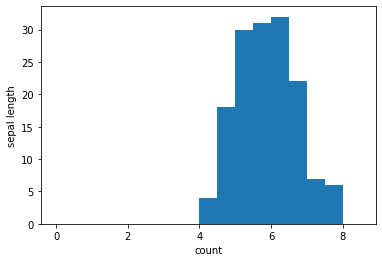

In [4]:
def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal_length'].max() + 1, 0.5)
    fig = plt.hist(df['sepal_length'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')
    
    
histo()
plt.show()

In [5]:
x = df['sepal_length'].values
x.dtype

dtype('float64')

In [0]:
#Sample Mean

In [6]:
sum(i for i in x) / len(x)

5.843333333333335

In [7]:
x_mean = np.mean(x)
x_mean

5.843333333333334

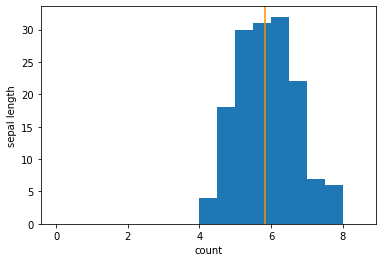

In [8]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

In [0]:
#Sample Variance

In [9]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

0.6856935123042504

In [10]:
var = np.var(x, ddof=1)
var

0.6856935123042507

In [11]:
df['sepal_length'].var() # note that Bessel's correction is the default

0.6856935123042505

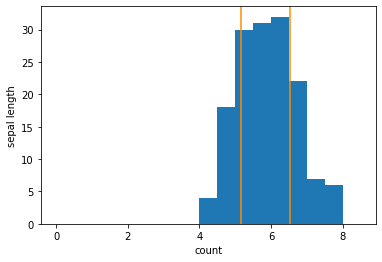

In [12]:
histo()
plt.axvline(x_mean + var, color='darkorange')
plt.axvline(x_mean - var, color='darkorange')
plt.show()

In [0]:
#Sample Standard Deviation

In [13]:
(sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5

0.8280661279778628

In [14]:
np.sqrt(np.var(x, ddof=1))

0.828066127977863

In [15]:
std = np.std(x, ddof=1)
std

0.828066127977863

In [16]:
df['sepal_length'].std() # note that Bessel's correction is the default

0.8280661279778629

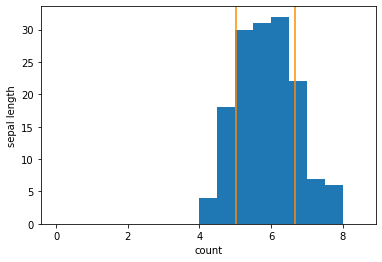

In [17]:
histo()
plt.axvline(x_mean + std, color='darkorange')
plt.axvline(x_mean - std, color='darkorange')
plt.show()

In [0]:
#Min/Max

In [18]:
np.min(x)

4.3

In [19]:
np.max(x)

7.9

In [0]:
#Mode

In [20]:
lst = list(x)
mode = max(set(lst), key=lst.count)
mode

5.0

In [21]:
lst.count(mode)

10

In [22]:
stats.mode(x)

ModeResult(mode=array([5.]), count=array([10]))

In [0]:
#25th and 75th Percentile

In [23]:
y = np.sort(x)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th

5.1

In [24]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

6.4

In [25]:
np.percentile(x, q=[25, 75], interpolation='lower')

array([5.1, 6.4])

In [26]:
df['sepal_length'].quantile(0.25, interpolation='lower')

5.1

In [27]:
df['sepal_length'].quantile(0.75, interpolation='lower')

6.4

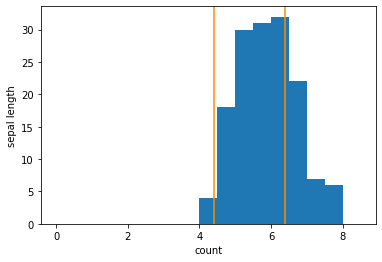

In [28]:
histo()
plt.axvline(percentile_75th, color='darkorange')
plt.axvline(percentile_25th - var, color='darkorange')
plt.show()

In [0]:
#Median (50th Percentile)

In [29]:
x = np.sort(x)

tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

5.8

In [30]:
np.median(x)

5.8

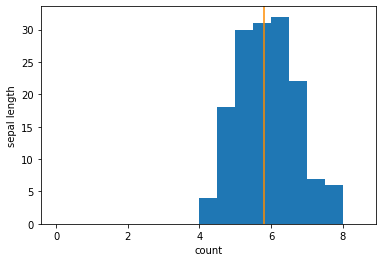

In [31]:
histo()
plt.axvline(median, color='darkorange')
plt.show()